In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


# Import data
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [44]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [45]:
# Clean data by filtering out top 2.5% and bottom 2.5% page views
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [46]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [47]:
def draw_line_plot():
    # Draw the line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='red')
    
    # Set titles and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save the plot to a file
    fig.savefig('line_plot.png')

    # Avoid returning the figure
    plt.close(fig)  # Close the figure to prevent display in some environments

    return fig

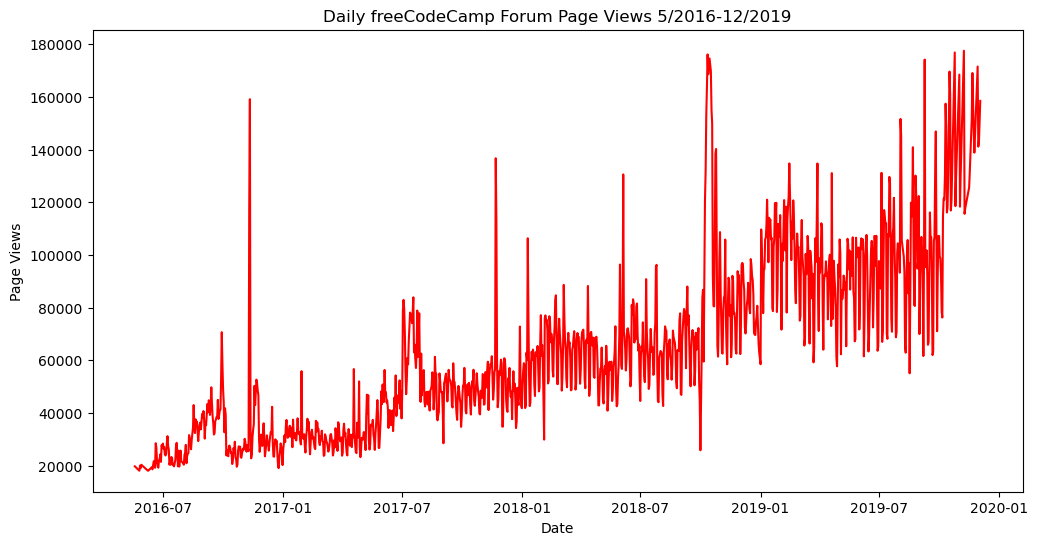

In [48]:
draw_line_plot()

In [49]:
def draw_bar_plot():
    # Prepare data for bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    # Pivot the data to get the required format
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Rename the columns (which represent the months) to their names
    df_bar.columns = [calendar.month_name[i] for i in df_bar.columns]

    # Ensure the months are in calendar order
    df_bar = df_bar[calendar.month_name[1:]]  # Order by the months from January to December

    # Draw the bar plot
    fig = df_bar.plot(kind='bar', figsize=(12, 8)).figure
    
    # Set titles and labels
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    
    # Save the plot to a file
    fig.savefig('bar_plot.png')

    # Close the figure to prevent display in some environments
    plt.close(fig)

    return fig

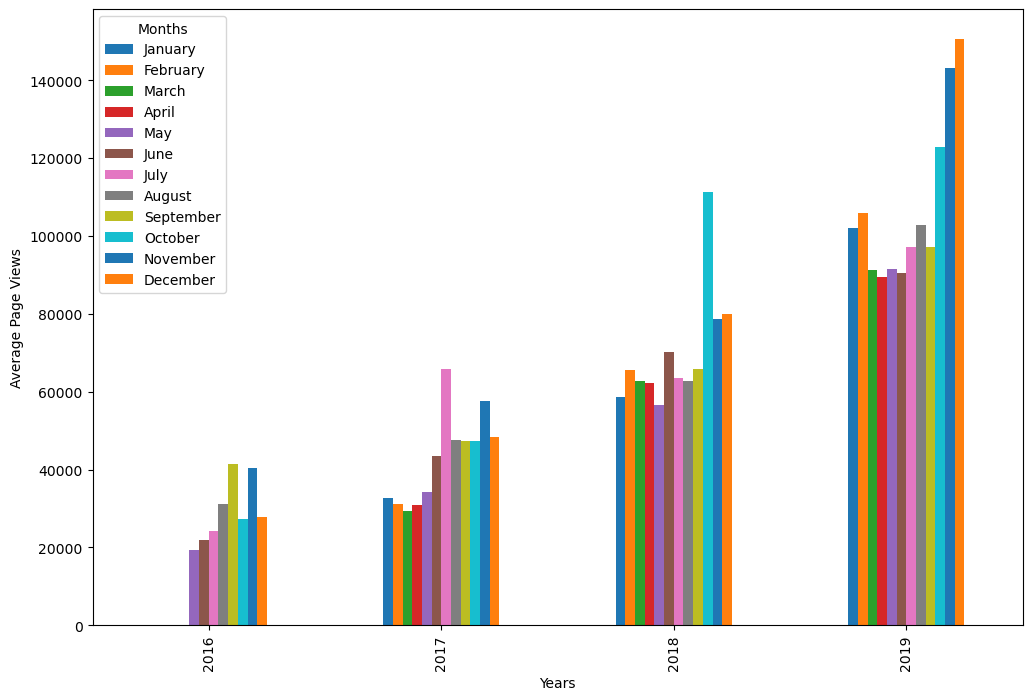

In [50]:
draw_bar_plot()

In [51]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')
    
    # Draw the box plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save the plot to a file
    fig.savefig('box_plot.png')

    # Close the figure to prevent display in some environments
    plt.close(fig)

    return fig

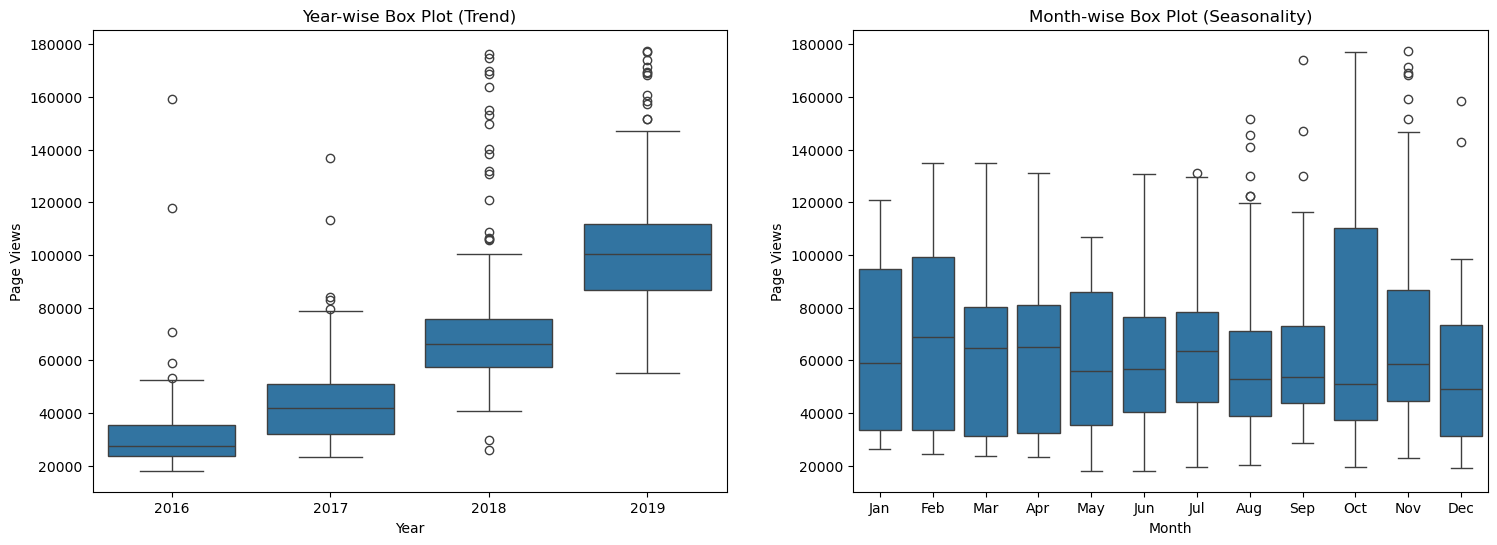

In [53]:
draw_box_plot()